<a href="https://colab.research.google.com/github/affan1317/GEOL0069-EOYA/blob/main/Sentinel_2_Optical_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive in every notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The rasterio package allows us to read and write geospatial raster data, useful for Sentinel-2 processing and analysis.

In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 31.2 MB/s eta 0:00:00


The bands in Sentinel-2 data are defined, and a combination of several bands is selected for classification. More bands might require more memory, so the Google Colab session might crash when too much bands are used.

In [ ]:
import rasterio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

base_path = "/content/drive/MyDrive/GEOL0069/EOYA/S2A_MSIL1C_20240304T171211_N0510_R112_T19XEC_20240304T192251.SAFE/GRANULE/L1C_T19XEC_A045440_20240304T171205/IMG_DATA/" # Specify the path to the bands
bands_paths = {
    'B1': base_path + 'T19XEC_20240304T171211_B01.jp2',
    'B2': base_path + 'T19XEC_20240304T171211_B02.jp2',
    'B3': base_path + 'T19XEC_20240304T171211_B03.jp2',
    'B4': base_path + 'T19XEC_20240304T171211_B04.jp2',
    'B5': base_path + 'T19XEC_20240304T171211_B05.jp2',
    'B6': base_path + 'T19XEC_20240304T171211_B06.jp2',
    'B7': base_path + 'T19XEC_20240304T171211_B07.jp2',
    'B8': base_path + 'T19XEC_20240304T171211_B08.jp2',
    'B9': base_path + 'T19XEC_20240304T171211_B09.jp2',
    'B10': base_path + 'T19XEC_20240304T171211_B10.jp2',
    'B11': base_path + 'T19XEC_20240304T171211_B11.jp2',
    'B12': base_path + 'T19XEC_20240304T171211_B12.jp2',
    'B8A': base_path + 'T19XEC_20240304T171211_B8A.jp2',
}

# Read and stack the band images
band_data = []
for band in ['B4', 'B3', 'B2']:
# for band in ['B12', 'B11', 'B4']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data)
# valid_data_mask = np.all(band_stack > 0, axis=2)   # mask not needed because all pixels have values


In [ ]:
band_stack.shape   # 3 bands

(10980, 10980, 3)

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Reshape for K-means, only including valid data
# X = band_stack[valid_data_mask].reshape((-1, 3))
X = band_stack.reshape((-1, 3))

# K-means clustering with 2 classes
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
# kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

# Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int)

# Place cluster labels in the locations corresponding to valid data
# labels_image[valid_data_mask] = labels
labels_image = labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Replace all values above or equal to 0.7 with 1
labels_image[labels_image >= 0.7] = 1

# Replace all values below 0.7 with 0
labels_image[labels_image < 0.7] = 0

In [ ]:
np.unique(labels_image)

array([0, 1], dtype=int32)

In [ ]:
labels_image.shape

(120560400,)

In [ ]:
labels_image.shape[0]**.5

10980.0

In [ ]:
XX = labels_image.reshape((10980,10980))

In [ ]:
np.unique(XX)

array([0, 1], dtype=int32)

In [ ]:
XX.shape

(10980, 10980)

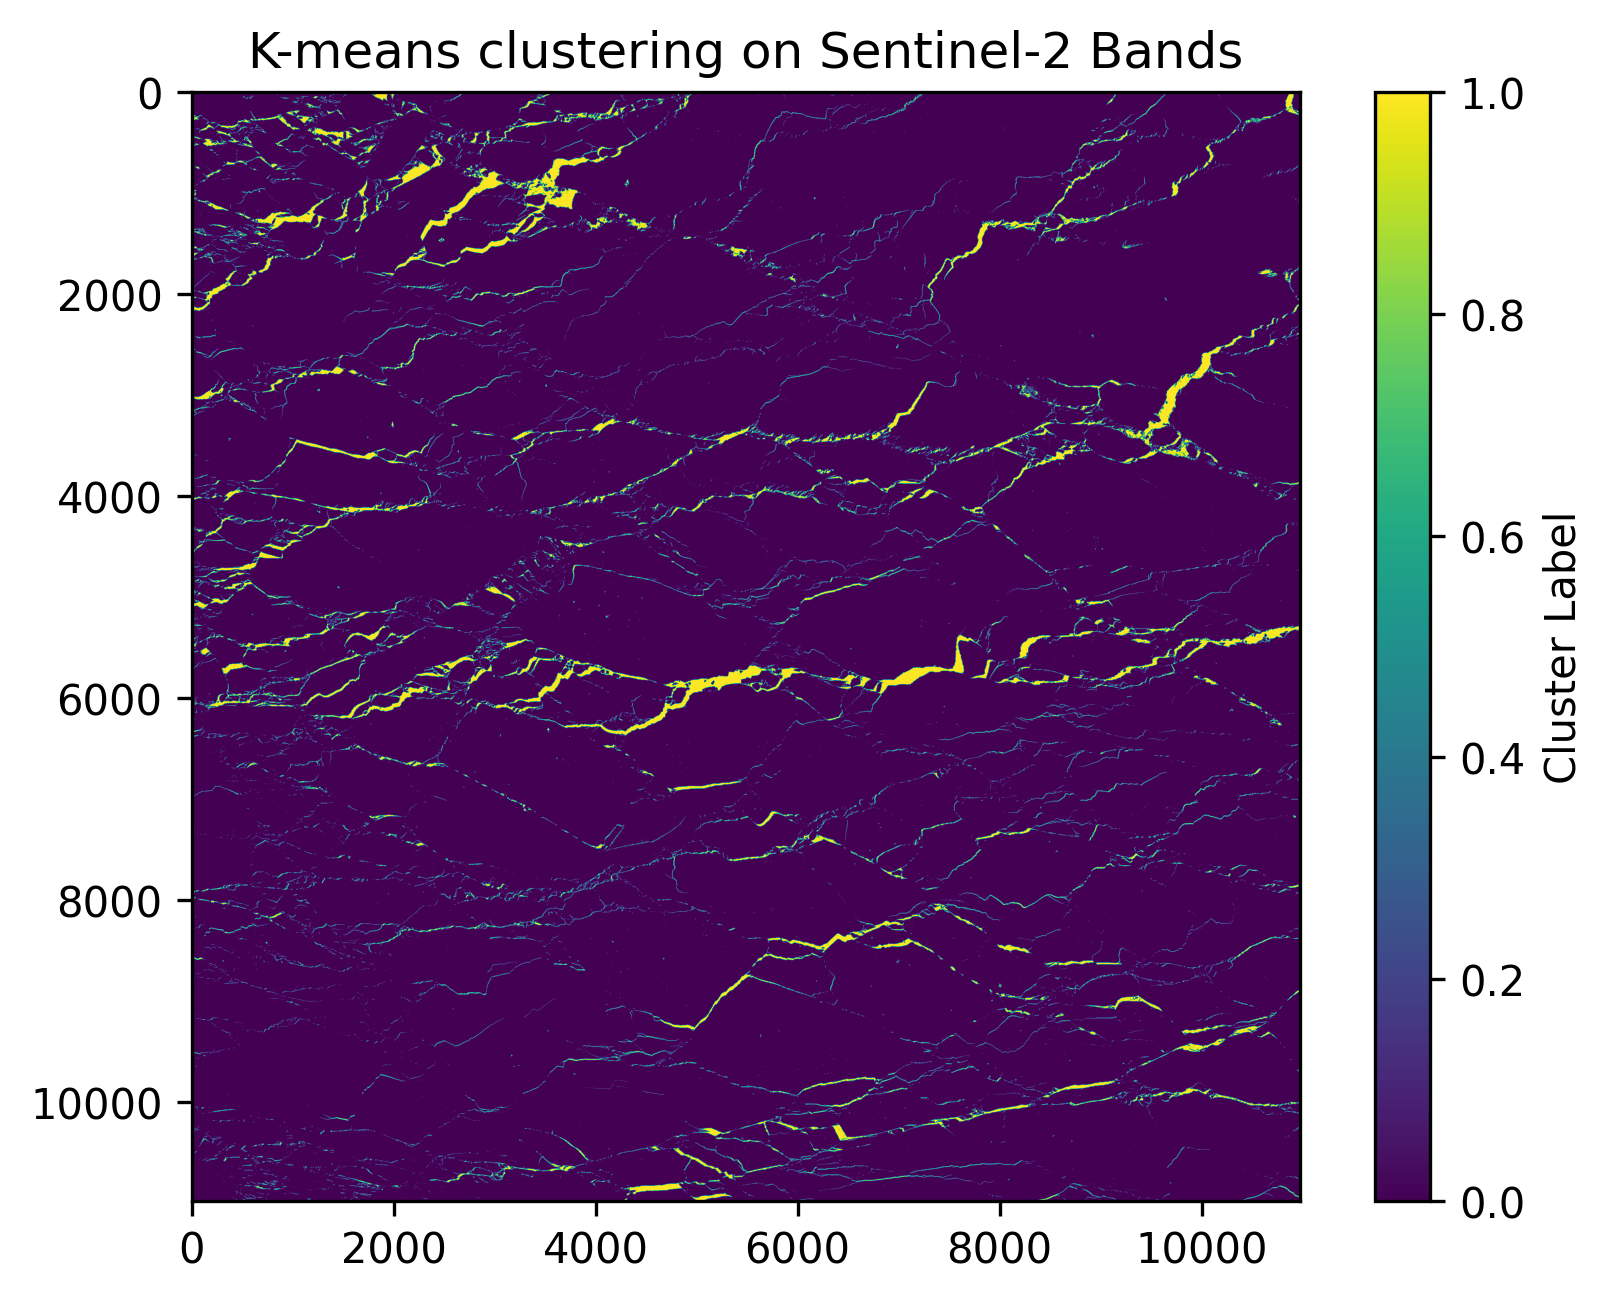

In [ ]:
# Plotting the result
plt.imshow(XX, cmap='viridis')
plt.title('K-means clustering on Sentinel-2 Bands')
plt.colorbar(label='Cluster Label')

# Save the plot in Google Drive
plt.savefig('/content/drive/MyDrive/GEOL0069/EOYA/kmeans.png')
plt.show()
